# Tabel content.
Data-preprocessing:  
                    
                    1.Basic stats for the features
                     
                     2.Handling missing values
                     
                     3.Understanding about duplicates
            

Text-preprocessing:  
                     
                     1.Stop-words
                     
                     2.Punctuations
                     
                     3.Tokenization
                     
                     4.stemming

Exploratory data analysis: 
                             
                             Univariate Analysis on Text Feature
                             
                             1. How many unique words are present in train data
                             
                             2. How are word frequencies distributed
                             
                             3.How to featurize text field
                             
                             4.the text feature useful in predicitng y_i
                             
                             5.the text feature stable across train, test datasets  

Machine learning models:  
                         
                         1.Naive Baye's
                         
                         2.K-nearest neighbor
                         
                         3.Logistic Regression (with balance)
                         
                         4.Logistic Regression (with out balance)
                         
                         5.Support vector classifier (with balance)
                         
                         6.Random forest (base model DT)
                         
                         7.Stacking (LR, SVC, RF)
                         
                         8.Voting classifier  
            


# Import libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import pickle 
import string
string.punctuation
import re
import nltk
import time
from scipy.sparse import hstack
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore")


# Read training data

# Terminology:
What is a dataset?

Rows and columns

Data-point

Feature/variable

# Read train dataset

In [66]:
data_train = pd.read_csv(r"C:\Users\ASHOK\Downloads\Corona_NLP_train.csv")
print('Number of data points : ', data_train.shape[0])
print('Number of features : ', data_train.shape[1])
print('Features : ', data_train.columns.values)
data_train.head()

Number of data points :  41157
Number of features :  6
Features :  ['UserName' 'ScreenName' 'Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# Read test dataset

In [67]:
data_test = pd.read_csv(r"C:\Users\ASHOK\Downloads\Corona_NLP_test.csv")
print('Number of data points : ', data_test.shape[0])
print('Number of features : ', data_test.shape[1])
print('Features : ', data_test.columns.values)
data_test.head()

Number of data points :  3798
Number of features :  6
Features :  ['UserName' 'ScreenName' 'Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# these 6 features, we will be using only 4 features in this Tweet.

In [68]:
data_train = data_train[["Location", "TweetAt", "OriginalTweet","Sentiment"]]
data_test =  data_test[["Location", "TweetAt", "OriginalTweet","Sentiment"]]

In [69]:
print('Number of data points : ', data_train.shape[0])
print('Number of features : ', data_train.shape[1])
print('Features : ', data_train.columns.values)
data_train.head()

Number of data points :  41157
Number of features :  4
Features :  ['Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [70]:
print('Number of data points : ', data_test.shape[0])
print('Number of features : ', data_test.shape[1])
print('Features : ', data_test.columns.values)
data_test.head()

Number of data points :  3798
Number of features :  4
Features :  ['Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,Location,TweetAt,OriginalTweet,Sentiment
0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# Raw filtering

In [71]:
data = data_train[(data_train["Sentiment"] == "Extremely Negative") & (data_train["Location"] == "NYC")]
data

,Location,TweetAt,OriginalTweet,Sentiment
3125,NYC,18-03-2020,Kroger ($KR) the largest supermarket chain in ...,Extremely Negative
29298,NYC,05-04-2020,Bill Gates: Heres how to make up for lost tim...,Extremely Negative
31561,NYC,07-04-2020,Worrisome gt gt At least four grocery workers ...,Extremely Negative
33009,NYC,07-04-2020,Low paid are on the front lines of the pandemi...,Extremely Negative
37524,NYC,10-04-2020,"Farmers Dump Milk, Break Eggs as Restaurant Cl...",Extremely Negative


In [72]:
data1 = data_train[(data_train["TweetAt"] == "03-03-2020")]
data1

,Location,TweetAt,OriginalTweet,Sentiment


In [73]:
data_train.iloc[[5]] 

,Location,TweetAt,OriginalTweet,Sentiment
5,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive


In [74]:
data_train.iloc[[1,5,100]]

,Location,TweetAt,OriginalTweet,Sentiment
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
5,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive
100,"Portsmouth, England",16-03-2020,I hate grocery shopping in general but I swear...,Extremely Negative


In [75]:
data_train.iloc[5:-1]

,Location,TweetAt,OriginalTweet,Sentiment
5,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive
6,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
...,...,...,...,...
41151,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive
41152,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive


In [76]:
data2 = data_train.loc[[2,5],["Location", "TweetAt"]]
data2

,Location,TweetAt
2,Vagabonds,16-03-2020
5,"ÜT: 36.319708,-82.363649",16-03-2020


In [77]:
data3 = data_train.loc[:5, ["Location", "TweetAt"]]
data3

,Location,TweetAt
0,London,16-03-2020
1,UK,16-03-2020
2,Vagabonds,16-03-2020
3,NaN,16-03-2020
4,NaN,16-03-2020
5,"ÜT: 36.319708,-82.363649",16-03-2020


In [78]:
data4 = data_train[data_train["Location"] == "UK"]
data4.shape

(232, 4)

In [79]:
data18 = data_train.iloc[[18,22,55]]
data18

,Location,TweetAt,OriginalTweet,Sentiment
18,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
55,"West Midlands, England",16-03-2020,Morning everyone have a great and safe day. ??...,Extremely Positive


In [80]:
data19 = data_train.iloc[18:22]
data19    

,Location,TweetAt,OriginalTweet,Sentiment
18,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
19,"Denver, CO",16-03-2020,"For those who aren't struggling, please consid...",Positive
20,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
21,Global,16-03-2020,https://t.co/AVKrR9syff\r\r\n\r\r\nThe COVID-1...,Neutral


In [81]:
datacol = data_train.loc[[2,5], ["Location", "Sentiment", "OriginalTweet" ]]
datacol

,Location,Sentiment,OriginalTweet
2,Vagabonds,Positive,Coronavirus Australia: Woolworths to give elde...
5,"ÜT: 36.319708,-82.363649",Positive,As news of the regions first confirmed COVID-...


In [82]:
dataco1 = data_train.loc[1:5, ["OriginalTweet"]]
dataco1

,OriginalTweet
1,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV..."
5,As news of the regions first confirmed COVID-...


In [83]:
data0 = data_train[(data_train["Location"] == "Vagabonds" )& (data_train["Sentiment"] == "Positive")]
data0.shape

(1, 4)

In [84]:
data_train.head(1)

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral


In [94]:
cross_tab = pd.crosstab(data_train["Location"], data_train["Sentiment"]).head(5)
cross_tab

Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
Location,,,,,
,0,0,1,2,1
Texas,0,1,0,0,0
170825 ? shinee ? svt ? vixx,0,0,0,0,1
UK to Detroit Worldwide,0,0,1,0,0
VA - TX - ??- Belgium??,0,0,0,1,0


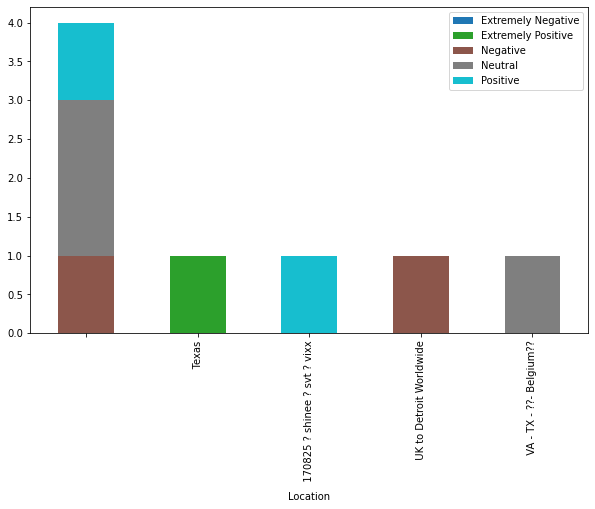

In [99]:
cross_tab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper right")
#plt.xlabel("Release Year")
#plt.ylabel("Proportion")
plt.show()

# Basic stats for the feature: train_Location

We have total 41157 unique type of Location

41157 - 32567 = 73724  missing values

540 / 32567 *100 = 1.6%  of the words london

In [504]:
print(data_train["Location"].describe())

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object


In [505]:
#Names of different word type
print(data_train['Location'].unique())

['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


In [506]:
#Find the 10 most frequent word type names
Location_count_type = Counter(list(data_train["Location"]))
Location_count_type.most_common(10)

[(nan, 8590),
 ('London', 540),
 ('United States', 528),
 ('London, England', 520),
 ('New York, NY', 395),
 ('Washington, DC', 373),
 ('United Kingdom', 337),
 ('Los Angeles, CA', 281),
 ('India', 268),
 ('UK', 232)]

# Basic stats for the feature: test_Location

We have total 3798 unique type of Location

3798 - 2964 = 834 missing values

75 / 2964 *100 = 2.1%  of the words london

In [507]:
print(data_test["Location"].describe())

count              2964
unique             1717
top       United States
freq                 75
Name: Location, dtype: object


In [508]:
#Names of different word type
print(data_test['Location'].unique())

['NYC' 'Seattle, WA' nan ... 'Israel ??' 'Farmington, NM' 'Haverford, PA']


In [509]:
#Find the 10 most frequent word type names
Location_count_type = Counter(list(data_test["Location"]))
Location_count_type.most_common(10)

[(nan, 834),
 ('United States', 75),
 ('London, England', 48),
 ('Washington, DC', 38),
 ('New York, NY', 34),
 ('Los Angeles, CA', 33),
 ('Toronto, Ontario', 29),
 ('Canada', 29),
 ('California, USA', 26),
 ('London', 25)]

# Basic stats for the feature: train_TweetAt

3448 / 41157 *100 = 8% of the 20-03-2020

In [510]:
print(data_train["TweetAt"].describe())

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object


In [511]:
TweetAt_count_type_train = Counter(list(data_train["TweetAt"]))
TweetAt_count_type_train.most_common(10)

[('20-03-2020', 3448),
 ('19-03-2020', 3215),
 ('25-03-2020', 2979),
 ('18-03-2020', 2742),
 ('21-03-2020', 2653),
 ('22-03-2020', 2114),
 ('23-03-2020', 2062),
 ('17-03-2020', 1977),
 ('08-04-2020', 1881),
 ('07-04-2020', 1843)]

# Basic stats for the feature: test_TweetAt

1233 / 3798 *100 = 32% of the 13-03-2020

In [512]:
print(data_test["TweetAt"].describe())

count           3798
unique            15
top       13-03-2020
freq            1233
Name: TweetAt, dtype: object


In [513]:
TweetAt_count_type_test = Counter(list(data_test["TweetAt"]))
TweetAt_count_type_test.most_common(10)

[('13-03-2020', 1233),
 ('12-03-2020', 685),
 ('14-03-2020', 614),
 ('15-03-2020', 519),
 ('16-03-2020', 472),
 ('11-03-2020', 165),
 ('10-03-2020', 54),
 ('09-03-2020', 16),
 ('08-03-2020', 9),
 ('04-03-2020', 8)]

# Basic stats for the feature: train_OriginalTweet

we have total 41157 unique type of OriginalTweet 

In [514]:
print(data_train["OriginalTweet"].describe())

count                                                 41157
unique                                                41157
top       How is the FDA making it difficult for the to ...
freq                                                      1
Name: OriginalTweet, dtype: object


In [515]:
#name of different type word
print(data_train['OriginalTweet'].unique())

['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'
 'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P'
 ...
 'You know it\x92s getting tough when @KameronWilds  is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!'
 'Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus'
 "@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. 

In [516]:
#Find the 10 most frequent word type names
OriginalTweet_count_type = Counter(list(data_train["OriginalTweet"]))
OriginalTweet_count_type.most_common(5)

[('@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
  1),
 ('advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
  1),
 ('Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
  1),
 ("My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
  1),
 ("Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #

# Basic stats for the feature: test_OriginalTweet

we have total 41157 unique type of OriginalTweet

In [517]:
print(data_test["OriginalTweet"].describe())

count                                                  3798
unique                                                 3798
top       @Unkle_K @BabatundeComedy Nah fr fr. This twee...
freq                                                      1
Name: OriginalTweet, dtype: object


In [518]:
print(data_test["OriginalTweet"].unique())

['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'
 "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY"
 'Find out how you can protect yourself and loved ones from #coronavirus. ?'
 ...
 "Asst Prof of Economics @cconces was on @NBCPhiladelphia talking about her recent research on coronavirus' impact on the economy. Watch it here (starting at :33): https://t.co/8tfYNoro5l"
 "Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #COVID2019"
 'I and @ForestandPaper members are committed to the safety of our employees and our end-users. We are monitoring COVID-19

In [519]:
#Find the 10 most frequent word type names
OriginalTweet_count_type_test = Counter(list(data_test["OriginalTweet"]))
OriginalTweet_count_type_test.most_common(5)

[('TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
  1),
 ("When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
  1),
 ('Find out how you can protect yourself and loved ones from #coronavirus. ?',
  1),
 ('#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu',
  1),
 ('#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dun

#  Basic stats for the feature: train_Sentiment
we can do is to encode the categories with numbers. We will also create just 3 possible emotions: Positive, Neutral and Negative.

In [520]:
data_train["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [521]:
data_train['Sentiment'] = data_train['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

In [522]:
data_train["Sentiment"].value_counts()

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64

#  Basic stats for the feature: test_Sentiment
we can do is to encode the categories with numbers. We will also create just 3 possible emotions: Positive, Neutral and Negative.

In [523]:
data_test["Sentiment"].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [524]:
data_test['Sentiment'] = data_test['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

In [525]:
data_test["Sentiment"].value_counts()

0    1633
2    1546
1     619
Name: Sentiment, dtype: int64

# Handling missing values

<AxesSubplot:>

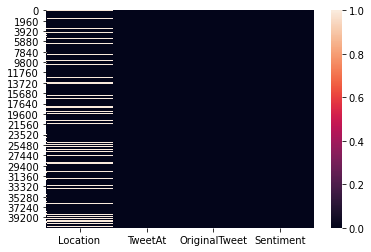

In [526]:
sns.heatmap(data_train.isnull())

<AxesSubplot:>

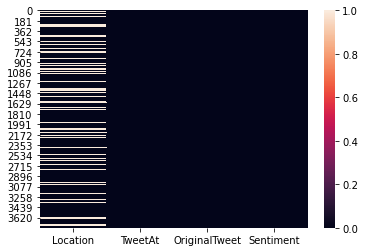

In [527]:
sns.heatmap(data_test.isnull())

In [528]:
data_train.isnull().sum()

Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [529]:
data_test.isnull().sum()

Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


We save data files at every major step in our processing in "pickle" files. If you are stuck anywhere (or) if some code takes too long to run on our laptop, our may use the pickle files we give to speed things up.

In [530]:
data_train = data_train.loc[~data_train['Location'].isnull()]
print('Number of data points After eliminating price=NULL :', data_train.shape[0])

Number of data points After eliminating price=NULL : 32567


In [531]:
data_test = data_test.loc[~data_test['Location'].isnull()]
print('Number of data points After eliminating price=NULL :', data_test.shape[0])

Number of data points After eliminating price=NULL : 2964


# 
the number of data_train points from 41K to 32K.

the number of data_test points from 37K to 29K.

In [532]:
with open("32k_apparel_data_train_After_remove_missing_values", "wb") as f:
    pickle.dump(data_train,f)

In [533]:
with open("29k_apparel_data_test_After_remove_missing_values", "wb") as f:
    pickle.dump(data_test,f)

# Remove missing value after read train_data

In [534]:
data_train = pd.read_pickle(r"C:\Users\ASHOK\Desktop\32k_apparel_data_train_After_remove_missing_values")

In [535]:
print('Number of data points : ', data_train.shape[0])
print('Number of features : ', data_train.shape[1])
print('Features : ', data_train.columns.values)
data_train.head()

Number of data points :  32567
Number of features :  4
Features :  ['Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,2
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2
5,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,2
6,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,2


# Remove missing values after read test_data

In [536]:
data_test = pd.read_pickle(r"C:\Users\ASHOK\Desktop\29k_apparel_data_test_After_remove_missing_values")

In [537]:
print('Number of data points : ', data_test.shape[0])
print('Number of features : ', data_test.shape[1])
print('Features : ', data_test.columns.values)
data_test.head()

Number of data points :  2964
Number of features :  4
Features :  ['Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,Location,TweetAt,OriginalTweet,Sentiment
0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,2
3,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0
4,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,1
5,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,1


# <h3> Understand about duplicates.<h3>
Remove OriginalTweet which diffier only in last last few words

In [538]:
#find number of  duplicate OriginalTweet.
print(sum(data_train.duplicated("OriginalTweet")))

0


In [539]:
print(sum(data_test.duplicated("OriginalTweet")))

0


#  Text pre-processing

In [540]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [541]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [542]:
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')          # replace linebreak with \r\n
        sent = sent.replace('\\"', ' ')            # how to replace some content in mail template before send in C#
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)  # remove anything that is not a letter or number
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)  # stop words
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [543]:
data_train['OriginalTweet'] = preprocess_text(data_train['OriginalTweet'].values)
data_test['OriginalTweet'] = preprocess_text(data_test['OriginalTweet'].values)

100%|██████████| 2964/2964 [00:00<00:00, 11049.55it/s]


In [544]:
data_train['Location'] = preprocess_text(data_train['Location'].values)
data_test['Location'] = preprocess_text(data_test['Location'].values)

100%|██████████| 2964/2964 [00:00<00:00, 60579.67it/s]


# 

 After text-preprocessing 32k data_train points to save in pickel file.

In [545]:
with open("32k_apparel_data_train_after_text_Preprocessing", "wb") as f:
    pickle.dump(data_train,f)

#
After text-preprocessing 29k data_test points to save in pickel file.

In [546]:
with open("29k_apparel_data_test_after_text_Preprocessing", "wb") as f:
    pickle.dump(data_test,f)

# Exploratort data analysis

In [547]:
data_train = pd.read_pickle(r'C:\Users\ASHOK\Desktop\32k_apparel_data_train_after_text_preprocessing')

In [548]:
print('Number of data points : ', data_train.shape[0])
print('Number of features : ', data_train.shape[1])
print('Features : ', data_train.columns.values)
data_train.head()

Number of data points :  32567
Number of features :  4
Features :  ['Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,Location,TweetAt,OriginalTweet,Sentiment
0,london,16-03-2020,menyrbie phil gahan chrisitv https co ifz9fan2...,1
1,uk,16-03-2020,advice talk neighbours family exchange phone n...,2
2,vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,2
5,36 319708 82 363649,16-03-2020,news region first confirmed covid 19 case came...,2
6,35 926541 78 753267,16-03-2020,cashier grocery store sharing insights covid 1...,2


# Observed below plots
1.Multi_class_classification problem.

2.Imbalanced data.

3.train & test have similarly distribution of yi.

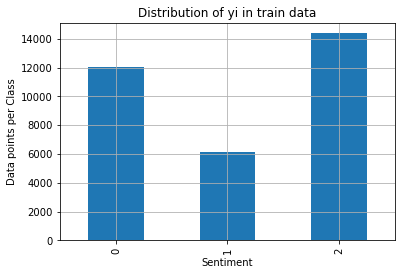

Number of data points in class 2 : 14383 ( 44.164 %)
Number of data points in class 0 : 12012 ( 36.884 %)
Number of data points in class 1 : 6172 ( 18.952 %)


In [549]:
train_class_distribution = data_train['Sentiment'].value_counts().sort_index()

my_colors = 'r'
train_class_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/data_train.shape[0]*100), 3), '%)')


In [550]:
data_test = pd.read_pickle(r'C:\Users\ASHOK\Desktop\29k_apparel_data_test_after_text_preprocessing')

In [551]:
print('Number of data points : ', data_test.shape[0])
print('Number of features : ', data_test.shape[1])
print('Features : ', data_test.columns.values)
data_test.head()

Number of data points :  2964
Number of features :  4
Features :  ['Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


,Location,TweetAt,OriginalTweet,Sentiment
0,nyc,02-03-2020,trending new yorkers encounter empty supermark...,0
1,seattle wa,02-03-2020,could not find hand sanitizer fred meyer turne...,2
3,chicagoland,02-03-2020,panic buying hits newyork city anxious shopper...,0
4,melbourne victoria,03-03-2020,toiletpaper dunnypaper coronavirus coronavirus...,1
5,los angeles,03-03-2020,remember last time paid 2 99 gallon regular ga...,1


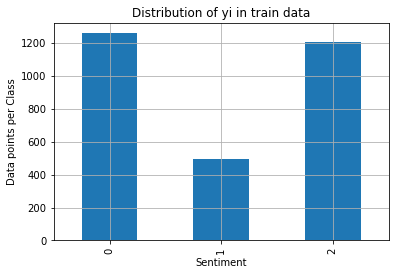

Number of data points in class 0 : 1260 ( 42.51 %)
Number of data points in class 2 : 1207 ( 40.722 %)
Number of data points in class 1 : 497 ( 16.768 %)


In [552]:
test_class_distribution = data_test['Sentiment'].value_counts().sort_index()

my_colors = 'r'
test_class_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/data_test.shape[0]*100), 3), '%)')


# 
<h3>Splitting data_train into X_train and y_train</h3>
<h3>Splitting data_test into X_test and y_test</h3>

In [553]:
X_train = data_train.drop(['Sentiment'], axis = 1)
y_train = data_train['Sentiment'].values

In [554]:
X_test = data_test.drop(['Sentiment'], axis = 1)
y_test = data_test['Sentiment'].values

In [555]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32567, 3) (32567,)
(2964, 3) (2964,)


# <h3>Univariate Analysis on Text Feature</h3>
1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test datasets?

# Univariate Analysis on Variation Feature
<p style="font-size:18px;"> <b></b> Location_train_data, What type of feature is it ?</p>
<p style="font-size:16px;"><b></b> Location is a categorical variable </p>
<p style="font-size:18px;"> <b></b> How many categories are there and how they are distributed</p>

In [556]:
unique_Locations_train = X_train['Location'].value_counts()
print('Number of Unique Location :', unique_Locations_train.shape[0])
print(unique_Locations_train.head(10))

Number of Unique Location : 10486
london            580
united states     532
london england    528
washington dc     407
new york ny       403
                  379
united kingdom    347
los angeles ca    301
india             300
uk                261
Name: Location, dtype: int64


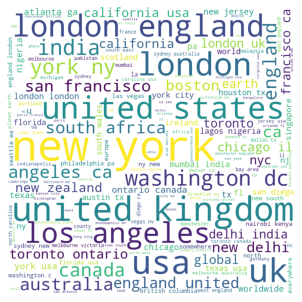

In [557]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in X_train['Location'].values: 
    val = str(val)
    tokens = val.split() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [558]:
print("Ans: There are", unique_Locations_train.shape[0] ,"different categories of variations in the train data",)

Ans: There are 10486 different categories of variations in the train data


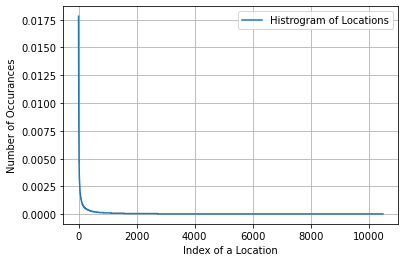

In [559]:
#They are distibuted as follows
s = sum(unique_Locations_train.values);
h = unique_Locations_train.values/s;
plt.plot(h, label="Histrogram of Locations")
plt.xlabel('Index of a Location')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

# Observations:
1. skew distribution means bell shape curve to divided median as well statistical process.
2. Decreasing order most of the frequency words occures 0 to ruffle 100 and remaining occures less time.
3. top most location 0.175 often lot of locations occures few times.

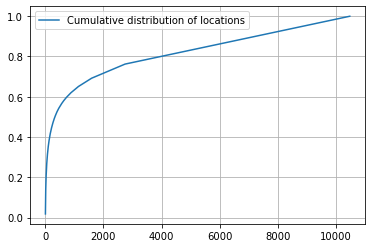

In [560]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of locations')
plt.grid()
plt.legend()
plt.show()

# Observations:
1. Top 4000 locations of 80 percent my data out of 10486.
2. 4000 > 20 percent of my data.

# How to featurize this location feature ?
There are two ways we can featurize this variable 

1.One hot Encoding

2.Response coding

We will choose the featurization based on the ML model we use. For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests.

In [561]:
# one-hot encoding of Gene feature.
location_vectorizer = CountVectorizer()
train_location_feature_onehotCoding = location_vectorizer.fit_transform(X_train['Location'])
test_location_feature_onehotCoding = location_vectorizer.transform(X_test['Location'])

In [562]:
X_train["Location"].head(5)

0                 london
1                     uk
2              vagabonds
5    36 319708 82 363649
6    35 926541 78 753267
Name: Location, dtype: object

In [563]:
location_vectorizer.get_feature_names()

['000',
 '000000',
 '001480',
 '002469',
 '004575',
 '00854',
 '00859',
 '010435',
 '011246',
 '0118',
 '011885',
 '01293',
 '01568',
 '016',
 '020',
 '020256',
 '02903',
 '04',
 '040837',
 '0419',
 '042747',
 '043526',
 '044914',
 '04508',
 '05005',
 '056968',
 '06040',
 '060616',
 '061171',
 '07444',
 '074721',
 '0800',
 '083',
 '085603',
 '08759',
 '0886',
 '088903',
 '090148',
 '092678',
 '098536',
 '099457',
 '0hy',
 '0lu',
 '0x1337c4f3',
 '0x514',
 '10',
 '100',
 '1000',
 '10012',
 '10028',
 '10036',
 '101',
 '10139',
 '1021',
 '103',
 '1030',
 '103rd',
 '104',
 '105',
 '106',
 '10700',
 '107195',
 '10822',
 '10921',
 '109958',
 '11',
 '110001',
 '111',
 '113',
 '113451',
 '114',
 '11413',
 '11455',
 '1148',
 '115',
 '11691',
 '117',
 '118',
 '119',
 '12',
 '120',
 '120108',
 '121',
 '121902',
 '122',
 '12204',
 '123',
 '123437',
 '124',
 '124545',
 '127',
 '1273',
 '12th',
 '13',
 '133',
 '13467',
 '134773',
 '136951',
 '1381',
 '138chenoweth',
 '14',
 '1408',
 '1415',
 '141675'

In [564]:
print("train_location_feature_onehotCoding is converted feature using one-hot encoding method.The shape of location feature:", train_location_feature_onehotCoding.shape)

train_location_feature_onehotCoding is converted feature using one-hot encoding method.The shape of location feature: (32567, 8215)


# How good is this location feature  in predicting y_i

For values of alpha =  1e-05 The log loss is: 1.0355509762373065
For values of alpha =  0.0001 The log loss is: 1.0354415913058526
For values of alpha =  0.001 The log loss is: 1.0348610709446284
For values of alpha =  0.01 The log loss is: 1.0349509673790953
For values of alpha =  0.1 The log loss is: 1.035561600772106
For values of alpha =  1 The log loss is: 1.0356143958668824


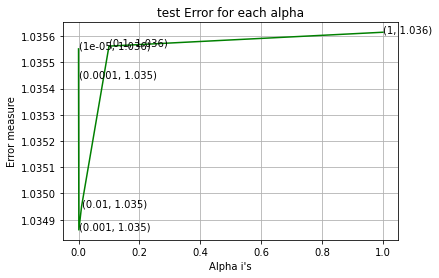

In [565]:
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.
test_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_location_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_location_feature_onehotCoding, y_train)
    y_location_pred = sig_clf.predict_proba(test_location_feature_onehotCoding)
    
    test_log_error_array.append(log_loss(y_test, y_location_pred))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, y_location_pred))

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("test Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
best_alpha = np.argmin(test_log_error_array)

In [568]:
clf_location = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_location.fit(train_location_feature_onehotCoding, y_train)
sig_clf_location = CalibratedClassifierCV(clf_location, method="sigmoid")
sig_clf_location.fit(train_location_feature_onehotCoding, y_train)

y_loc_pred = sig_clf_location.predict_proba(train_location_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, y_loc_pred))

y_loc_pred= sig_clf_location.predict_proba(test_location_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, y_loc_pred))

For values of best alpha =  0.001 The train log loss is: 1.0347543902422858
For values of best alpha =  0.001 The test log loss is: 1.0348610709446284


# Is the location feature stable across all the data sets (Test, Train)?

the Test errors would be significantly more than train error.

In [569]:
print("How many data points in Test dataset are covered by the ", unique_Locations_train.shape[0], " location in train dataset")

test_loc = X_test[X_test['Location'].isin(list(set(X_train['Location'])))].shape[0]

print('In test data',test_loc, 'out of ',X_test.shape[0],":" ,(test_loc/X_test.shape[0])*100)

How many data points in Test dataset are covered by the  10486  location in train dataset
In test data 2180 out of  2964 : 73.54925775978407


In [575]:
with open("data_location_predication", "wb") as f:
    pickle.dump(sig_clf_location,f)

In [576]:
location = pd.read_pickle(r"data_location_predication")
location

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, loss='log',
                                                    random_state=42))

#  Univariate Analysis on TweetAt Feature
<p style="font-size:18px;"> <b></b> TweetAt_train_data, What type of feature is it ?</p>
<p style="font-size:16px;"><b></b> TweetAt is a numeric but dates variable </p>
<p style="font-size:18px;"> <b></b> How many dates are there?</p>

In [577]:
unique_TweetAt_train = X_train['TweetAt'].value_counts()
print('Number of Unique TweetAt :', unique_TweetAt_train.shape[0])
print(unique_TweetAt_train.head(10))
# ( 30 / 32567) * 100 = 0.9% of unique dates.

Number of Unique TweetAt : 30
20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
08-04-2020    1527
07-04-2020    1487
Name: TweetAt, dtype: int64


In [579]:
print("Ans: There are", unique_TweetAt_train.shape[0] ,"different dates of TweetAt in the train data",)

Ans: There are 30 different dates of TweetAt in the train data


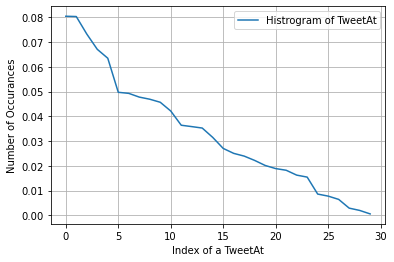

In [580]:
#They are distibuted as follows
s = sum(unique_TweetAt_train.values);
h = unique_TweetAt_train.values/s;
plt.plot(h, label="Histrogram of TweetAt")
plt.xlabel('Index of a TweetAt')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

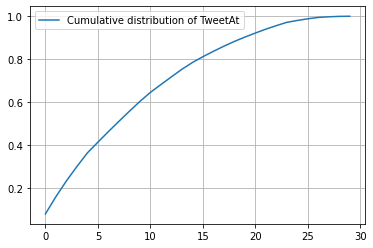

In [581]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of TweetAt')
plt.grid()
plt.legend()
plt.show()

# Observation
1.Top most 15 TweetAt 80% distribution. 

# How to featurize this TweetAt feature ?
There are two ways we can featurize this variable 

1.One hot Encoding

2.Response coding

We will choose the featurization based on the ML model we use. For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests.

In [582]:
# one-hot encoding of Gene feature.
TweetAt_vectorizer = CountVectorizer()
train_TweetAt_feature_onehotCoding = TweetAt_vectorizer.fit_transform(X_train['TweetAt'])
test_TweetAt_feature_onehotCoding = TweetAt_vectorizer.transform(X_test['TweetAt'])

In [583]:
X_train["TweetAt"].head(5)

0    16-03-2020
1    16-03-2020
2    16-03-2020
5    16-03-2020
6    16-03-2020
Name: TweetAt, dtype: object

In [584]:
TweetAt_vectorizer.get_feature_names()

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '16',
 '17',
 '18',
 '19',
 '20',
 '2020',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

In [585]:
print("train_TweetAt_feature_onehotCoding is converted feature using one-hot encoding method.The shape of TweetAt feature:", train_TweetAt_feature_onehotCoding.shape)

train_TweetAt_feature_onehotCoding is converted feature using one-hot encoding method.The shape of TweetAt feature: (32567, 31)


# How good is this TweetAt feature  in predicting y_i

For values of alpha =  1e-05 The log loss is: 1.0299493644216988
For values of alpha =  0.0001 The log loss is: 1.0334548143816615
For values of alpha =  0.001 The log loss is: 1.0369874275215158
For values of alpha =  0.01 The log loss is: 1.05415487317871
For values of alpha =  0.1 The log loss is: 1.0552198868425355
For values of alpha =  1 The log loss is: 1.0378323125152673


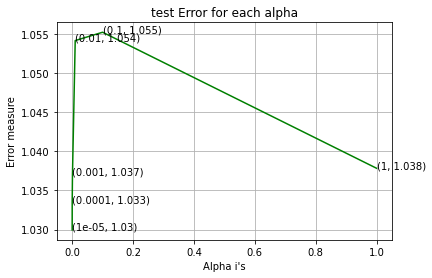

In [586]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.
test_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_TweetAt_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_TweetAt_feature_onehotCoding, y_train)
    y_tweet_pred = sig_clf.predict_proba(test_TweetAt_feature_onehotCoding)
    
    test_log_error_array.append(log_loss(y_test, y_tweet_pred))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, y_tweet_pred))

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("test Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
best_alpha = np.argmin(test_log_error_array)

In [587]:
clf_TW = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_TW.fit(train_TweetAt_feature_onehotCoding, y_train)
sig_clf_TW = CalibratedClassifierCV(clf_TW, method="sigmoid")
sig_clf_TW.fit(train_TweetAt_feature_onehotCoding, y_train)

y_tweet_pred = sig_clf_TW.predict_proba(train_TweetAt_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, y_tweet_pred))

y_tweet_pred = sig_clf_TW.predict_proba(test_TweetAt_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, y_tweet_pred))

For values of best alpha =  1e-05 The train log loss is: 1.0466623878391932
For values of best alpha =  1e-05 The test log loss is: 1.0299493644216988


# Is the TweetAt feature stable across all the data sets (Test, Train)?

the Test errors would be significantly more than train error.

In [588]:
print("How many data points in Test dataset are covered by the ", unique_TweetAt_train.shape[0], " TweetAt in train dataset")

test_tweet = X_test[X_test['TweetAt'].isin(list(set(X_train['TweetAt'])))].shape[0]

print('In test data',test_tweet, 'out of ',X_test.shape[0],":" ,(test_tweet/X_test.shape[0])*100)

How many data points in Test dataset are covered by the  30  TweetAt in train dataset
In test data 377 out of  2964 : 12.719298245614036


In [589]:
with open("data_TweetAt_predication", "wb") as f:
    pickle.dump(sig_clf_TW,f)

In [590]:
TweetAt = pd.read_pickle(r"data_TweetAt_predication")
TweetAt

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, loss='log',
                                                    random_state=42))

 #  Univariate Analysis on Variation Feature
<p style="font-size:18px;"> <b></b> OriginalTweet_train_data, What type of feature is it ?</p>
<p style="font-size:16px;"><b></b> OriginalTweet is a categorical variable </p>
<p style="font-size:18px;"> <b></b> How many categorical are there?</p>

In [591]:
unique_OriginalTweet_train = X_train['OriginalTweet'].value_counts()
print('Number of Unique OriginalTweet :', unique_OriginalTweet_train.shape[0])
print(unique_OriginalTweet_train.head(5))

Number of Unique OriginalTweet : 32537
oil prices falling amid covid 19 recession beginning end fracking                                                                               3
covid 19 pandemic ongoing many people nervous going grocery store old tradition seeing uptick business milkman                                  3
saudi arabia bracing economic downturn oil prices plummet due coronavirus pandemic https co pq3erx9euz                                          3
19 shall pass                                                                                                                                   2
humanity best please woman helped elderly couple get food scared go crowded grocery store outbreak proving even dark times kindness prevails    2
Name: OriginalTweet, dtype: int64


In [592]:
print("Ans: There are", unique_OriginalTweet_train.shape[0] ,"different categories of OriginalTweet in the train data",)

Ans: There are 32537 different categories of OriginalTweet in the train data


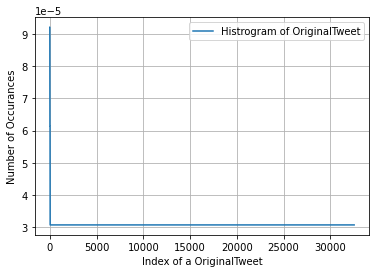

In [593]:
#They are distibuted as follows
s = sum(unique_OriginalTweet_train.values);
h = unique_OriginalTweet_train.values/s;
plt.plot(h, label="Histrogram of OriginalTweet")
plt.xlabel('Index of a OriginalTweet')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

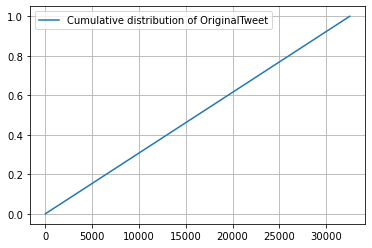

In [594]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of OriginalTweet')
plt.grid()
plt.legend()
plt.show()

# How to featurize this OriginalTweet feature ?
There are two ways we can featurize this variable 

1.One hot Encoding

2.Response coding

We will choose the featurization based on the ML model we use. For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests.

In [595]:
# one-hot encoding of Gene feature.
OriginalTweet_vectorizer = CountVectorizer()
train_OriginalTweet_feature_onehotCoding = OriginalTweet_vectorizer.fit_transform(X_train['OriginalTweet'])
test_OriginalTweet_feature_onehotCoding = OriginalTweet_vectorizer.transform(X_test['OriginalTweet'])

In [596]:
X_train["OriginalTweet"].head(5)

0    menyrbie phil gahan chrisitv https co ifz9fan2...
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
5    news region first confirmed covid 19 case came...
6    cashier grocery store sharing insights covid 1...
Name: OriginalTweet, dtype: object

In [597]:
OriginalTweet_vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '0000009375',
 '0000hrs',
 '000162',
 '00042',
 '000cr',
 '000francs',
 '000pcs',
 '000s',
 '000th',
 '0010',
 '0016',
 '0025450557',
 '0026691661',
 '005',
 '007',
 '008',
 '00am',
 '00ctnbm22s',
 '00f7gzyfom',
 '00hrs',
 '00pdsup4wb',
 '00pm',
 '00pwksjyey',
 '00pxujzhmf',
 '00urjfxstc',
 '00zyjjmcet',
 '01',
 '010',
 '0101',
 '011',
 '0113',
 '0121',
 '01236',
 '01273',
 '013',
 '0131',
 '01392576476',
 '014',
 '01449',
 '0147',
 '01474',
 '0169061211',
 '017',
 '01765',
 '01892',
 '01952',
 '01ae5shygg',
 '01he1moz2x',
 '01hr',
 '01kg',
 '01oc3pig5b',
 '01wbjdrnfd',
 '02',
 '020',
 '0200hrs',
 '0203',
 '021',
 '02268443322',
 '023',
 '027',
 '0274',
 '028',
 '02920',
 '02ch7r0rlu',
 '02dlx6wbt3',
 '02kklx47ez',
 '02uqpatpn5',
 '02utqkozdg',
 '02zy7g1xsx',
 '03',
 '0300',
 '03031239999',
 '03065659733',
 '0330',
 '03338819977',
 '03344859556',
 '0337210852',
 '034',
 '0344',
 '0345',
 '03454',
 '0351',
 '03byer4mbq',
 '03hrs',
 '03ms4hdel0',
 '03ofwt3z0e',
 

# How good is this OriginalTweet feature  in predicting y_i

For values of alpha =  1e-05 The log loss is: 0.5678333364022101
For values of alpha =  0.0001 The log loss is: 0.5578827026927498
For values of alpha =  0.001 The log loss is: 0.6340111982029188
For values of alpha =  0.01 The log loss is: 0.7730384906279294
For values of alpha =  0.1 The log loss is: 0.90305508052819
For values of alpha =  1 The log loss is: 1.0019338870937604


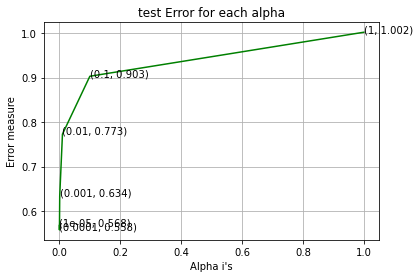

In [598]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.
test_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_OriginalTweet_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_OriginalTweet_feature_onehotCoding, y_train)
    y_OriginalTweet_pred = sig_clf.predict_proba(test_OriginalTweet_feature_onehotCoding)
    
    test_log_error_array.append(log_loss(y_test, y_OriginalTweet_pred))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, y_OriginalTweet_pred))

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("test Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
best_alpha = np.argmin(test_log_error_array)

In [ ]:
train_OriginalTweet_feature_onehotCoding

In [599]:
clf_OR = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_OR.fit(train_OriginalTweet_feature_onehotCoding, y_train)
sig_clf_OR = CalibratedClassifierCV(clf_TW, method="sigmoid")
sig_clf_OR.fit(train_OriginalTweet_feature_onehotCoding, y_train)

y_OR_pred = sig_clf_OR.predict_proba(train_OriginalTweet_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, y_OR_pred))

y_OR_pred = sig_clf_OR.predict_proba(test_OriginalTweet_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, y_OR_pred))

For values of best alpha =  0.0001 The train log loss is: 0.279717558792373
For values of best alpha =  0.0001 The test log loss is: 0.5678333364022101


In [600]:
print("How many data points in Test dataset are covered by the ", unique_OriginalTweet_train.shape[0], " TweetAt in train dataset")

test_OR = X_test[X_test['OriginalTweet'].isin(list(set(X_train['OriginalTweet'])))].shape[0]

print('In test data',test_OR, 'out of ',X_test.shape[0],":" ,(test_OR/X_test.shape[0])*100)

How many data points in Test dataset are covered by the  32537  TweetAt in train dataset
In test data 0 out of  2964 : 0.0


In [601]:
with open("data_OriginalTweet_predication", "wb") as f:
    pickle.dump(sig_clf_OR,f)

In [603]:
OriginalTweet = pd.read_pickle(r"data_OriginalTweet_predication")
OriginalTweet

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, loss='log',
                                                    random_state=42))

# <h1> Machine Learning Models</h1>

# 
the given indices, we will print the name of the features

we will check whether the feature present in the test point text or not

In [413]:
def get_impfeature_names(indices, OriginalTweet, Location, TweetAt, no_features):
    Location_count_vec = CountVectorizer()
    TweetAt_count_vec = CountVectorizer()
    OriginalTweet_count_vec = CountVectorizer()
    
    Location_vec = Location_count_vec.fit(X_train['Location'])
    TweetAt_vec  = TweetAt_count_vec.fit(X_train['TweetAt'])
    OriginalTweet_vec = OriginalTweet_count_vec.fit(X_train['OriginalTweet'])
    
    fea1_len = len(Location_vec.get_feature_names())
    fea2_len = len(TweetAt_count_vec.get_feature_names())
   # fea3_len = len(OriginalTweet_count_vec.get_feature_names())
    
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = Location_vec.get_feature_names()[v]
            yes_no = True if word == Location else False
            if yes_no:
                word_present += 1
                print(i, "Location feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = TweetAt_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == TweetAt else False
            if yes_no:
                word_present += 1
                print(i, "TweetAt feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = OriginalTweet_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in OriginalTweet.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

# merging Location, TweetAt and OriginalTweet features

In [98]:
train_vat_onehotCoding = hstack((train_location_feature_onehotCoding, train_TweetAt_feature_onehotCoding))
test_var_onehotCoding = hstack((test_location_feature_onehotCoding, test_TweetAt_feature_onehotCoding))


train_x_onehotCoding = hstack((train_OriginalTweet_feature_onehotCoding, train_vat_onehotCoding)).tocsr()
train_y = np.array(list(data_train["Sentiment"]))

test_x_onehotCoding = hstack((test_OriginalTweet_feature_onehotCoding, test_var_onehotCoding)).tocsr()
test_y = np.array(list(data_test["Sentiment"]))

In [99]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (32567, 75535)
(number of data points * number of features) in test data =  (2964, 75535)


In [604]:
with open("Merge_all_train_one_hot_encoding", "wb") as f:
    pickle.dump(train_x_onehotCoding,f)

In [605]:
with open("Merge_all_test_one_hot_encoding", "wb") as f:
    pickle.dump(test_x_onehotCoding,f)

In [606]:
with open("Merge_all_y_train", "wb") as f:
    pickle.dump(train_y,f)

In [607]:
with open("Merge_all_y_test", "wb") as f:
    pickle.dump(test_y,f)



High dimensional data don't focus (Tree models): Decision Tree, Random forest, K-NN only for low dimensional data.

High dimensional data only focus: linear models(LR, SVM, NB)

# Base Line Model
Naive Bayes
Hyper parameter tuning

for alpha = 1e-05
Log Loss : 0.9651478072794567
for alpha = 0.0001
Log Loss : 0.9651478072794567
for alpha = 0.001
Log Loss : 0.9651478072794567
for alpha = 0.1
Log Loss : 0.9651478072794567
for alpha = 1
Log Loss : 0.9651478072794567
for alpha = 10
Log Loss : 0.9651478072794567
for alpha = 100
Log Loss : 0.9651478072794567
for alpha = 1000
Log Loss : 0.9651478072794567


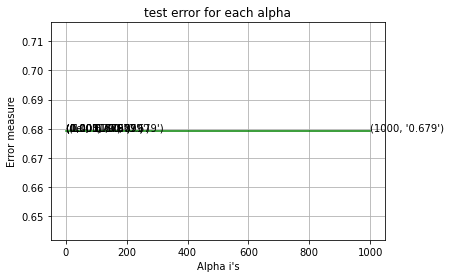

In [302]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
test_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf_NB = MultinomialNB(alpha=i)
    clf_NB.fit(train_x_onehotCoding, train_y)
    sig_clf_NB = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf_NB.fit(train_x_onehotCoding, train_y)
    sig_clf_NB_probs = sig_clf_NB.predict_proba(test_x_onehotCoding)
    test_log_error_array.append(log_loss(test_y, sig_clf_NB_probs))
    
    print("Log Loss :",log_loss(test_y, sig_clf_probs))
    
fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("test error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
     

In [303]:
clf_NB = MultinomialNB(alpha=alpha[best_alpha])
clf_NB.fit(train_x_onehotCoding, train_y)
sig_clf_NB = CalibratedClassifierCV(clf_NB, method="sigmoid")
sig_clf_NB.fit(train_x_onehotCoding, train_y)


predict_y_NB = sig_clf_NB.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_NB))

predict_y_NB = sig_clf_NB.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_NB))


For values of best alpha =  1e-05 The train log loss is: 0.7194704234038413
For values of best alpha =  1e-05 The test log loss is: 0.934992056215658


In [304]:
clf_NB = MultinomialNB(alpha=alpha[best_alpha])
clf_NB.fit(train_x_onehotCoding, train_y)
sig_clf_NB = CalibratedClassifierCV(clf_NB, method="sigmoid")
sig_clf_NB.fit(train_x_onehotCoding, train_y)
sig_clf_NB_probs = sig_clf_NB.predict_proba(test_x_onehotCoding)

print("Log Loss :",log_loss(test_y, sig_clf_NB_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf_NB.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])


Log Loss : 0.934992056215658
Number of missclassified point : 0.43016194331983804


In [371]:
clf.coef_

array([[ 0.11607475, -0.02070054, -0.00461144, ..., -0.09276307,
         0.04474261,  0.00550951],
       [ 0.0273251 , -0.06680108, -0.00180347, ..., -0.0580258 ,
        -0.09922999, -0.06561219],
       [-0.13417925,  0.0454723 ,  0.00604775, ...,  0.09942652,
         0.00400579,  0.02889123]])

-------------------- Confusion matrix --------------------


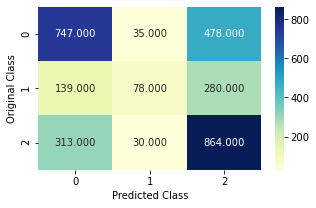

-------------------- Precision matrix (Columm Sum=1) --------------------


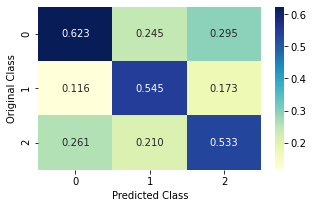

-------------------- Recall matrix (Row sum=1) --------------------


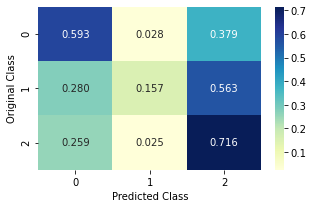

In [305]:
C_NB = confusion_matrix(test_y, sig_clf_NB.predict(test_x_onehotCoding.toarray()))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_NB, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_NB =(C_NB/C_NB.sum(axis=0))                                   #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_NB, annot=True, cmap="YlGnBu", fmt=".3f")         # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_NB =(((C_NB.T)/(C_NB.sum(axis=1))).T)                         # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_NB, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                                                                #                           [2/3, 4/7]]
  
                                                                # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
                                                                #                           [3/7, 4/7]]
                                                                # sum of row elements = 1 


In [306]:
#confusion matric = 747  35  478  => 1260    precision =[(747/1199)  (35/143)  (478/1622)       recall =[(747/1260)  (35/1260)  (478/1260)
#                   139  78  280  => 497                 (139/1199)  (78/143)  (280/1622)                (139/497)   (78/497)   (280/497)
#                   313  30  864  => 1207                (313/1199)  (30/143)  (864/1622)]*100           (313/1207)  (30/1207)  (864/1207) ]*100
#                   ^^   ^^   ^^
#                   1199 143 1622                        [ 62%  24%  29%                                  [ 59%  2%  37%
#                                                          11%  54%  17%                                    28%  15%  56%
#                                                          26%  21%  53% ]                                  25%  2%   71% ]

# Feature Importance, Correctly classified point

In [345]:
test_point_index = 50
no_feature = 100
predicted_cls = sig_clf_NB.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf_NB.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Location'].iloc[test_point_index],X_test['OriginalTweet'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.2917 0.2316 0.4767]]
Actual Class : 2
--------------------------------------------------
Out of the top  100  features  0 are present in query point


In [421]:
for i in range(3):
  test_point_index = i
  no_feature = 100
  predicted_cls = sig_clf_NB.predict(test_x_onehotCoding[test_point_index])
  print("Predicted Class :", predicted_cls[0])
  print("Predicted Class Probabilities:", np.round(sig_clf_NB.predict_proba(test_x_onehotCoding[test_point_index]),4))
  print("Actual Class :", test_y[test_point_index])
  indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
  print("-"*50)
  get_impfeature_names(indices[0], X_test['OriginalTweet'].iloc[test_point_index],X_test['TweetAt'].iloc[test_point_index].lower(),X_test['Location'].iloc[test_point_index], no_feature)

Predicted Class : 0
Predicted Class Probabilities: [[0.5059 0.1467 0.3474]]
Actual Class : 0
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Predicted Class : 2
Predicted Class Probabilities: [[0.3343 0.1416 0.5241]]
Actual Class : 2
--------------------------------------------------
Out of the top  100  features  0 are present in query point
Predicted Class : 0
Predicted Class Probabilities: [[0.4445 0.2132 0.3423]]
Actual Class : 0
--------------------------------------------------
Out of the top  100  features  0 are present in query point


# Feature Importance, Incorrectly classified point

In [351]:
test_point_index = 20
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_train['Location'].iloc[test_point_index],X_train['TweetAt'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.3413 0.3458 0.3129]]
Actual Class : 2
--------------------------------------------------
Out of the top  100  features  0 are present in query point


In [608]:
with open("Modeling_NB", "wb") as f:
    pickle.dump(sig_clf_NB,f)

# K Nearest Neighbour Classification
Hyper parameter tuning

k-nearest neighbor does not work well for high dimensional data.

one-hot-encoding may not be work well.

Let's using responding coding.

k = 7 is lowest error and best K is 7.

K-NN does not have feature importance but how to get interpretability.

simple query majarity rote and missiclassification.

for K = 5
Log Loss : 0.9970595776993924
for K = 11
Log Loss : 0.9851388870542283
for K = 15
Log Loss : 0.9839152460884772
for K = 21
Log Loss : 0.9789308338609402
for K = 31
Log Loss : 0.9759644330389357
for K = 41
Log Loss : 0.9734151540200783
for K = 51
Log Loss : 0.9712542589111713
for K = 99
Log Loss : 0.9651478072794567


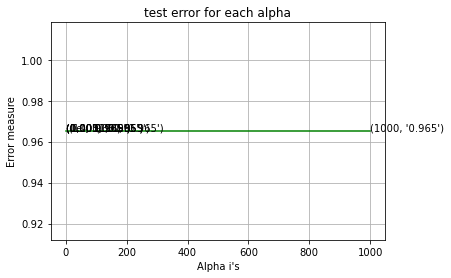

In [433]:
from sklearn.neighbors import KNeighborsClassifier
K = [5, 11, 15, 21, 31, 41, 51, 99]
test_log_error_array = []
for i in K:
    print("for K =", i)
    clf_KNN = KNeighborsClassifier(n_neighbors=i)
    clf_KNN.fit(train_x_onehotCoding, train_y)
    sig_clf_KNN = CalibratedClassifierCV(clf_KNN, method="sigmoid")
    sig_clf_KNN.fit(train_x_onehotCoding, train_y)
    sig_clf_KNN_probs = sig_clf_KNN.predict_proba(test_x_onehotCoding)
    test_log_error_array.append(log_loss(test_y, sig_clf_probs))
    
    print("Log Loss :",log_loss(test_y, sig_clf_KNN_probs)) 
fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("test error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [434]:
best_K = np.argmin(test_log_error_array)
clf_KNN = KNeighborsClassifier(n_neighbors = best_K)
clf_KNN.fit(train_x_onehotCoding, train_y)
sig_clf_KNN = CalibratedClassifierCV(clf_KNN, method="sigmoid")
sig_clf_KNN.fit(train_x_onehotCoding, train_y)

predict_y_KNN = sig_clf_KNN.predict_proba(train_x_onehotCoding)
print('For values of best K = ', best_K, "The train log loss is:",log_loss(y_train, predict_y_KNN))

predict_y_KNN = sig_clf_KNN.predict_proba(test_x_onehotCoding)
print('For values of best K = ', best_K, "The test log loss is:",log_loss(y_test, predict_y_KNN))


For values of best K =  0 The train log loss is: 1.044031548579584
For values of best K =  0 The test log loss is: 1.035690945486824


In [428]:
clf_KNN = KNeighborsClassifier(n_neighbors = best_K)
clf_KNN.fit(train_x_onehotCoding, train_y)
sig_clf_KNN = CalibratedClassifierCV(clf_KNN, method="sigmoid")
sig_clf_KNN.fit(train_x_onehotCoding, train_y)
sig_clf_KNN_probs = sig_clf_KNN.predict_proba(test_x_onehotCoding)

print("Log Loss :",log_loss(test_y, sig_clf_KNN_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf_KNN.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])


Log Loss : 1.035690945486824
Number of missclassified point : 0.5927800269905533


-------------------- Confusion matrix --------------------


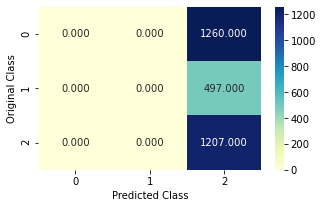

-------------------- Precision matrix (Columm Sum=1) --------------------


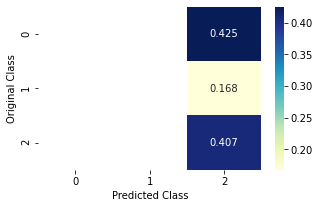

-------------------- Recall matrix (Row sum=1) --------------------


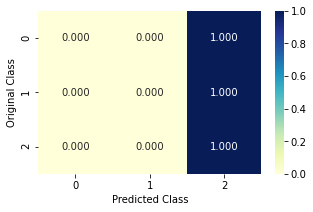

In [429]:
C_KNN = confusion_matrix(test_y, sig_clf_KNN.predict(test_x_onehotCoding))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_KNN, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_KNN =(C_KNN/C_KNN.sum(axis=0))                                   #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_KNN, annot=True, cmap="YlGnBu", fmt=".3f")         # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_KNN =(((C_KNN.T)/(C_KNN.sum(axis=1))).T)                         # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_KNN, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                                                                #                           [2/3, 4/7]]
  
                                                                # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
                                                                #                           [3/7, 4/7]]
                                                                # sum of row elements = 1 


In [432]:
clf_KNN = KNeighborsClassifier(n_neighbors=1)
clf_KNN.fit(train_x_onehotCoding, train_y)
sig_clf_KNN = CalibratedClassifierCV(clf_KNN, method="sigmoid")
sig_clf_KNN.fit(train_x_onehotCoding, train_y)

test_point_index = 10

predicted_cls = sig_clf_KNN.predict(test_x_onehotCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf_KNN.kneighbors(test_x_onehotCoding[test_point_index].reshape(1, -1), 1)
print("the k value for knn is",best_K,"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 2
the k value for knn is 0 and the nearest neighbours of the test points belongs to classes [1]
Fequency of nearest points : Counter({1: 1})


In [620]:
with open("Modeling_KNN", "wb") as f:
    pickle.dump(sig_clf_KNN,f)

# Logistic Regression

Hyper paramter tuning With Class balancing

Logistic regression one-hot-encoding eassy to solve high dimemsional data.

Linearly separable data.

Imbalance data same classes occures more frequently balance this logistic regression


for lambda = 1e-05
Log Loss : 0.6524049721287958
for lambda = 0.0001
Log Loss : 0.6342858295562952
for lambda = 0.001
Log Loss : 0.6791775784621669
for lambda = 0.1
Log Loss : 0.8861463119038421
for lambda = 1
Log Loss : 1.0027833237344592
for lambda = 10
Log Loss : 1.0254816714518158
for lambda = 100
Log Loss : 1.0270911859166205
for lambda = 1000
Log Loss : 1.02724488644792


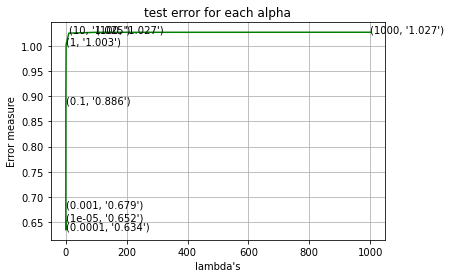

In [435]:
lambd = [10 ** x for x in range(-6, 3)]
test_log_error_array = []
for i in alpha:
    print("for lambda =", i)
    clf_LR = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf_LR.fit(train_x_onehotCoding, train_y)
    sig_clf_LR = CalibratedClassifierCV(clf_LR, method="sigmoid")
    sig_clf_LR.fit(train_x_onehotCoding, train_y)
    sig_clf_LR_probs = sig_clf_LR.predict_proba(test_x_onehotCoding)
    test_log_error_array.append(log_loss(test_y, sig_clf_LR_probs))
    
    print("Log Loss :",log_loss(test_y, sig_clf_LR_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("test error for each alpha")
plt.xlabel("lambda's")
plt.ylabel("Error measure")
plt.show()

In [436]:
best_alpha = np.argmin(test_log_error_array)
clf_LR = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_LR.fit(train_x_onehotCoding, train_y)
sig_clf_LR = CalibratedClassifierCV(clf_LR, method="sigmoid")
sig_clf_LR.fit(train_x_onehotCoding, train_y)

predict_y_LR = sig_clf_LR.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_LR))

predict_y_LR = sig_clf_LR.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_LR))

For values of best alpha =  0.0001 The train log loss is: 0.471327909458159
For values of best alpha =  0.0001 The test log loss is: 0.6342858295562952


In [437]:
clf_LR = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_LR.fit(train_x_onehotCoding, train_y)
sig_clf_LR = CalibratedClassifierCV(clf_LR, method="sigmoid")
sig_clf_LR.fit(train_x_onehotCoding, train_y)

sig_clf_LR_probs = sig_clf_LR.predict_proba(test_x_onehotCoding)

print("Log Loss :",log_loss(test_y, sig_clf_LR_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf_LR.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])


Log Loss : 0.6342858295562952
Number of missclassified point : 0.20681511470985156


-------------------- Confusion matrix --------------------


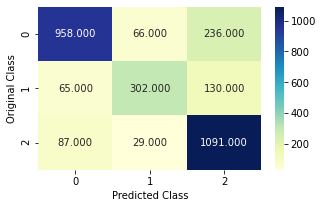

-------------------- Precision matrix (Columm Sum=1) --------------------


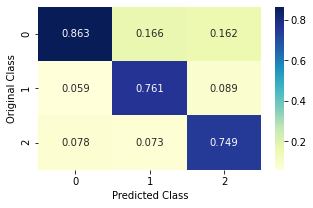

-------------------- Recall matrix (Row sum=1) --------------------


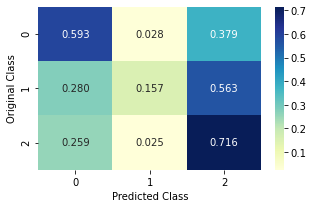

In [438]:
C_LR = confusion_matrix(test_y, sig_clf_LR.predict(test_x_onehotCoding))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_LR, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_LR =(C_LR/C_LR.sum(axis=0))                                   #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_LR, annot=True, cmap="YlGnBu", fmt=".3f")         # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_LR =(((C_LR.T)/(C_LR.sum(axis=1))).T)                         # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_NB, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                                                                #                           [2/3, 4/7]]
  
                                                                # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
                                                                #                           [3/7, 4/7]]
                                                                # sum of row elements = 1 


In [218]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

Predicted Class : 2
Predicted Class Probabilities: [[0.2637 0.1022 0.6341]]
Actual Class : 2


# Correctly Classified point

In [444]:
test_point_index = 5
no_feature = 100
predicted_cls_LR = sig_clf_LR.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf_LR.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls_LR-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['OriginalTweet'].iloc[test_point_index],X_test['Location'].iloc[test_point_index],X_test['TweetAt'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.464  0.1046 0.4314]]
Actual Class : 1
--------------------------------------------------
Out of the top  100  features  0 are present in query point


In [618]:
with open("Modeling_LR", "wb") as f:
    pickle.dump(sig_clf_LR,f)

# Without Class balancing
Hyper paramter tuning

for alpha = 1e-06
Log Loss : 0.6717453069596889
for alpha = 1e-05
Log Loss : 0.6537013043242196
for alpha = 0.0001
Log Loss : 0.6320943360495783
for alpha = 0.001
Log Loss : 0.6790822622660092
for alpha = 0.01
Log Loss : 0.7819281464599096
for alpha = 0.1
Log Loss : 0.8858690579249276
for alpha = 1
Log Loss : 0.9899991094089178


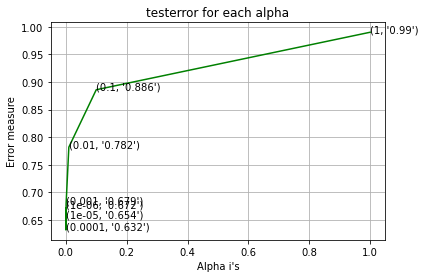

In [445]:
alpha = [10 ** x for x in range(-6, 1)]
test_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf_LRW = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf_LRW.fit(train_x_onehotCoding, train_y)
    sig_clf_LRW = CalibratedClassifierCV(clf_LRW, method="sigmoid")
    sig_clf_LRW.fit(train_x_onehotCoding, train_y)
    sig_clf_LRW_probs = sig_clf_LRW.predict_proba(test_x_onehotCoding)
    test_log_error_array.append(log_loss(test_y, sig_clf_LRW_probs))
    print("Log Loss :",log_loss(test_y, sig_clf_LRW_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("testerror for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_train['Location'].iloc[test_point_index],X_train['TweetAt'].iloc[test_point_index], no_feature)

In [446]:
best_alpha = np.argmin(test_log_error_array)
clf_LRW = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_LRW.fit(train_x_onehotCoding, train_y)
sig_clf_LRW = CalibratedClassifierCV(clf_LRW, method="sigmoid")
sig_clf_LRW.fit(train_x_onehotCoding, train_y)

predict_y_LRW = sig_clf_LRW.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_LRW))

predict_y_LRW = sig_clf_LRW.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_LRW))

For values of best alpha =  0.0001 The train log loss is: 0.47160555007912636
For values of best alpha =  0.0001 The test log loss is: 0.6320943360495783


In [447]:
clf_LRW = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_LRW.fit(train_x_onehotCoding, train_y)
sig_clf_LRW = CalibratedClassifierCV(clf_LRW, method="sigmoid")
sig_clf_LRW.fit(train_x_onehotCoding, train_y)

sig_clf_LRW_probs = sig_clf_LRW.predict_proba(test_x_onehotCoding)

print("Log Loss :",log_loss(test_y, sig_clf_LRW_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf_LRW.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])


Log Loss : 0.6320943360495783
Number of missclassified point : 0.2101889338731444


-------------------- Confusion matrix --------------------


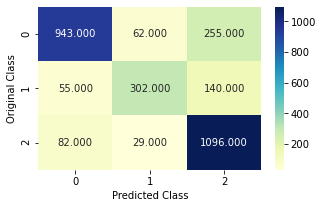

-------------------- Precision matrix (Columm Sum=1) --------------------


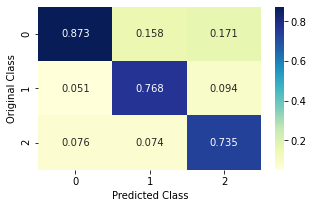

-------------------- Recall matrix (Row sum=1) --------------------


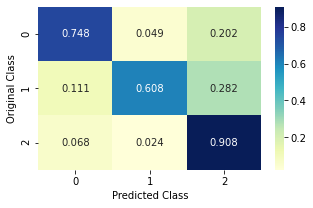

In [448]:
C_LRW = confusion_matrix(test_y, sig_clf_LRW.predict(test_x_onehotCoding))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_LRW, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_LRW =(C_LRW/C_LRW.sum(axis=0))                                   #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_LRW, annot=True, cmap="YlGnBu", fmt=".3f")         # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_LRW =(((C_LRW.T)/(C_LRW.sum(axis=1))).T)                         # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_LRW, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                                                                #                           [2/3, 4/7]]
  
                                                                # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
                                                                #                           [3/7, 4/7]]
                                                                # sum of row elements = 1 


# Feature Importance, Correctly Classified point

In [451]:
test_point_index = 10
no_feature = 500
predicted_cls_LR = sig_clf_LRW.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf_LR.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls_LR-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['OriginalTweet'].iloc[test_point_index],X_test['Location'].iloc[test_point_index],X_test['TweetAt'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.2181 0.2824 0.4995]]
Actual Class : 2
--------------------------------------------------
Out of the top  500  features  0 are present in query point


In [310]:
clf.coef_.shape

(3, 75535)

# Feature Importance, Incorrectly Classified point

In [452]:
test_point_index = 15
no_feature = 500
predicted_cls_LR = sig_clf_LRW.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf_LR.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls_LR-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['OriginalTweet'].iloc[test_point_index],X_test['Location'].iloc[test_point_index],X_test['TweetAt'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.5337 0.3095 0.1568]]
Actual Class : 0
--------------------------------------------------
Out of the top  500  features  0 are present in query point


In [617]:
with open("Modeling_LRW", "wb") as f:
    pickle.dump(sig_clf_LRW,f)

# Linear Support Vector Machines
Hyper paramter tuning

Linear support vector machine one-hot-encoding eassy to solve high dimemsional data.

loss = log => LR

loss = hinge => Linear SVM



for C = 1e-05
Log Loss : 0.9651478072794567
for C = 0.0001
Log Loss : 0.9651478072794567
for C = 0.001
Log Loss : 0.9651478072794567
for C = 0.01
Log Loss : 0.9651478072794567
for C = 0.1
Log Loss : 0.9651478072794567
for C = 1
Log Loss : 0.9651478072794567
for C = 10
Log Loss : 0.9651478072794567
for C = 100
Log Loss : 0.9651478072794567


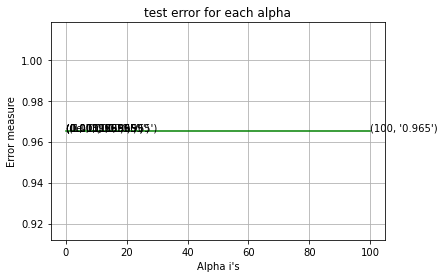

In [453]:
alpha = [10 ** x for x in range(-5, 3)]
test_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf_SVM = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf_SVM.fit(train_x_onehotCoding, train_y)
    sig_clf_SVM = CalibratedClassifierCV(clf_SVM, method="sigmoid")
    sig_clf_SVM.fit(train_x_onehotCoding, train_y)
    sig_clf_SVM_probs = sig_clf.predict_proba(test_x_onehotCoding)
    test_log_error_array.append(log_loss(test_y, sig_clf_SVM_probs))
    print("Log Loss :",log_loss(test_y, sig_clf_SVM_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, test_log_error_array,c='g')
for i, txt in enumerate(np.round(test_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],test_log_error_array[i]))
plt.grid()
plt.title("test error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [456]:
best_alpha = np.argmin(test_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf_SVM = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf_SVM.fit(train_x_onehotCoding, train_y)
sig_clf_SVM = CalibratedClassifierCV(clf_SVM, method="sigmoid")
sig_clf_SVM.fit(train_x_onehotCoding, train_y)

predict_y_SVM = sig_clf_SVM.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y_SVM))

predict_y_SVM = sig_clf_SVM.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y_SVM))

For values of best alpha =  1e-05 The train log loss is: 0.4411780665650195
For values of best alpha =  1e-05 The test log loss is: 0.656530274114809


In [455]:
clf_SVM = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf_SVM.fit(train_x_onehotCoding, train_y)
sig_clf_SVM = CalibratedClassifierCV(clf_SVM, method="sigmoid")
sig_clf_SVM.fit(train_x_onehotCoding, train_y)

sig_clf_SVM_probs = sig_clf_SVM.predict_proba(test_x_onehotCoding)

print("Log Loss :",log_loss(test_y, sig_clf_SVM_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf_SVM.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])


Log Loss : 0.6588776417386515
Number of missclassified point : 0.22267206477732793


-------------------- Confusion matrix --------------------


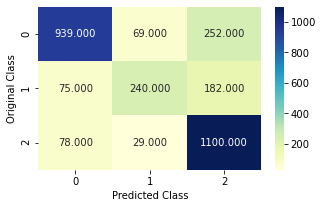

-------------------- Precision matrix (Columm Sum=1) --------------------


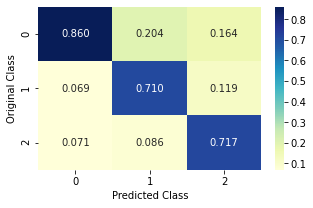

-------------------- Recall matrix (Row sum=1) --------------------


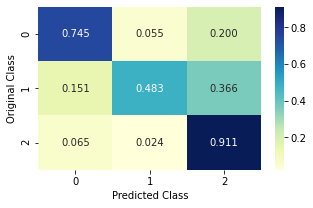

In [457]:
C_SVM = confusion_matrix(test_y, sig_clf_SVM.predict(test_x_onehotCoding.toarray()))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_SVM, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_SVM =(C_SVM/C_SVM.sum(axis=0))                                #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_SVM, annot=True, cmap="YlGnBu", fmt=".3f")        # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_SVM =(((C_SVM.T)/(C_SVM.sum(axis=1))).T)                       # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_SVM, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                                                                #                           [2/3, 4/7]]
  
                                                                # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
                                                                #                           [3/7, 4/7]]
                                                                # sum of row elements = 1 


# Feature Importance, Correctly Classified point

In [459]:
clf_SVM = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf_SVM.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls_SVM = sig_clf_SVM.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls_SVM[0])
print("Predicted Class Probabilities:", np.round(sig_clf_SVM.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls_SVM-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['OriginalTweet'].iloc[test_point_index],X_test['Location'].iloc[test_point_index],X_test['TweetAt'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.1449 0.0646 0.7905]]
Actual Class : 2
--------------------------------------------------
Out of the top  500  features  0 are present in query point


# Feature Importance, Incorrectly Classified point

In [461]:
clf_SVM = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf_SVM.fit(train_x_onehotCoding,train_y)
test_point_index = 23
no_feature = 500
predicted_cls_SVM = sig_clf_SVM.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls_SVM[0])
print("Predicted Class Probabilities:", np.round(sig_clf_SVM.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls_SVM-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['OriginalTweet'].iloc[test_point_index],X_test['Location'].iloc[test_point_index],X_test['TweetAt'].iloc[test_point_index], no_feature)

Predicted Class : 0
Predicted Class Probabilities: [[0.4173 0.3358 0.2469]]
Actual Class : 0
--------------------------------------------------
Out of the top  500  features  0 are present in query point


In [616]:
with open("Modeling_SVC", "wb") as f:
    pickle.dump(sig_clf_SVM,f)

# Random Forest Classifier
Hyper paramter tuning (With One hot Encoding)
Random forest is base model decision tree.

Decision tree don't work well high dimensional with only dimensional is small.

Two hyper-perameters:
1. n-estimeter : n-estimeter increase the model generized better.
2. max-depth.

In [464]:
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
test_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf_RF = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf_RF.fit(train_x_onehotCoding, train_y)
        sig_clf_RF = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf_RF.fit(train_x_onehotCoding, train_y)
        sig_clf_RF_probs = sig_clf_RF.predict_proba(test_x_onehotCoding)
        test_log_error_array.append(log_loss(test_y, sig_clf_RF_probs))
        print("Log Loss :",log_loss(test_y, sig_clf_RF_probs)) 


for n_estimators = 100 and max depth =  5
Log Loss : 0.6791775784621669
for n_estimators = 100 and max depth =  10
Log Loss : 0.6791775784621669
for n_estimators = 200 and max depth =  5
Log Loss : 0.6791775784621669
for n_estimators = 200 and max depth =  10
Log Loss : 0.6791775784621669
for n_estimators = 500 and max depth =  5
Log Loss : 0.6791775784621669
for n_estimators = 500 and max depth =  10
Log Loss : 0.6791775784621669
for n_estimators = 1000 and max depth =  5
Log Loss : 0.6791775784621669
for n_estimators = 1000 and max depth =  10
Log Loss : 0.6791775784621669
for n_estimators = 2000 and max depth =  5
Log Loss : 0.6791775784621669
for n_estimators = 2000 and max depth =  10
Log Loss : 0.6791775784621669


In [466]:
best_alpha = np.argmin(test_log_error_array)
clf_RF = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf_RF.fit(train_x_onehotCoding, train_y)
sig_clf_RF = CalibratedClassifierCV(clf_RF, method="sigmoid")
sig_clf_RF.fit(train_x_onehotCoding, train_y)

predict_y_RF = sig_clf_RF.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y_RF))

predict_y_RF = sig_clf_RF.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y_RF))

For values of best alpha =  100 The train log loss is: 0.8160396162738445
For values of best alpha =  100 The test log loss is: 0.8376107171940992


In [467]:
sig_clf_RF_probs = sig_clf_RF.predict_proba(test_x_onehotCoding)

print("Log Loss :",log_loss(test_y, sig_clf_RF_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf_RF.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])


Log Loss : 0.8376107171940992
Number of missclassified point : 0.3582995951417004


-------------------- Confusion matrix --------------------


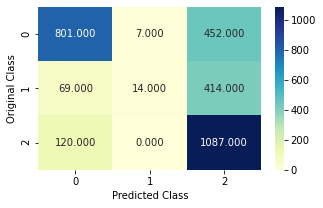

-------------------- Precision matrix (Columm Sum=1) --------------------


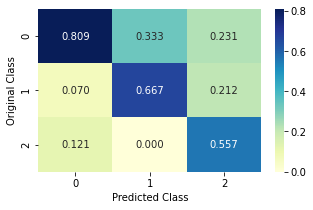

-------------------- Recall matrix (Row sum=1) --------------------


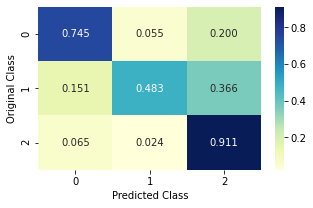

In [468]:
C_RF = confusion_matrix(test_y, sig_clf_RF.predict(test_x_onehotCoding.toarray()))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_RF, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_RF =(C_RF/C_RF.sum(axis=0))                                #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_RF, annot=True, cmap="YlGnBu", fmt=".3f")        # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_RF =(((C_RF.T)/(C_RF.sum(axis=1))).T)                       # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_SVM, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                                                                #                           [2/3, 4/7]]
  
                                                                # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
                                                                #                           [3/7, 4/7]]
                                                                # sum of row elements = 1 


In [471]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf_RF.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf_RF.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf_RF.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['OriginalTweet'].iloc[test_point_index],X_test['Location'].iloc[test_point_index],X_test['TweetAt'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.2462 0.1742 0.5796]]
Actual Class : 2
--------------------------------------------------
Out of the top  100  features  0 are present in query point


In [613]:
with open("Modeling_RF", "wb") as f:
    pickle.dump(sig_clf_RF,f)

# Stack the models 
testing with hyper parameter tuning

In [475]:
clf_LR = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf_LR.fit(train_x_onehotCoding, train_y)
sig_clf_LR = CalibratedClassifierCV(clf_LR, method="sigmoid")

clf_SVM = SGDClassifier(alpha=0.1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf_SVM.fit(train_x_onehotCoding, train_y)
sig_clf_SVM = CalibratedClassifierCV(clf_SVM, method="sigmoid")


clf_RF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
clf_RF.fit(train_x_onehotCoding, train_y)
sig_clf_RF = CalibratedClassifierCV(clf_RF, method="sigmoid")

In [476]:
sig_clf_LR.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(test_y, sig_clf_LR.predict_proba(test_x_onehotCoding))))
sig_clf_SVM.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(test_y, sig_clf_SVM.predict_proba(test_x_onehotCoding))))
sig_clf_RF.fit(train_x_onehotCoding, train_y)
print("Random Forest : Log Loss: %0.2f" % (log_loss(test_y, sig_clf_RF.predict_proba(test_x_onehotCoding))))

Logistic Regression :  Log Loss: 0.68
Support vector machines : Log Loss: 0.80
Random Forest : Log Loss: 0.78


In [480]:
from mlxtend.classifier import StackingClassifier
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf_LR, sig_clf_SVM, sig_clf_RF], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))))
    log_error =log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.925
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.714
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.610
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.593
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.612
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.619


In [482]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf_LR, sig_clf_SVM, sig_clf_RF], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])

Log loss (train) on the stacking classifier : 0.41234145240302833
Log loss (test) on the stacking classifier : 0.5933152971489851
Number of missclassified point : 0.22975708502024292


-------------------- Confusion matrix --------------------


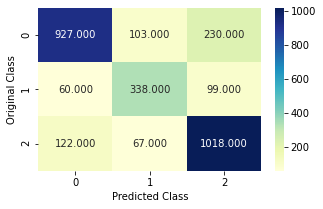

-------------------- Precision matrix (Columm Sum=1) --------------------


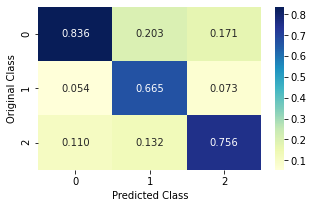

-------------------- Recall matrix (Row sum=1) --------------------


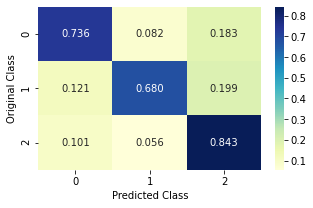

In [483]:
C_SC = confusion_matrix(test_y, sclf.predict(test_x_onehotCoding))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_SC, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_SC =(C_SC/C_SC.sum(axis=0))                                #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_SC, annot=True, cmap="YlGnBu", fmt=".3f")        # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_SC =(((C_SC.T)/(C_SC.sum(axis=1))).T)                       # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_SC, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                               

In [614]:
with open("Modeling_Stacking", "wb") as f:
    pickle.dump(sclf,f)

# Maximum Voting classifier

In [484]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('LR', sig_clf_LR), ('SVC', sig_clf_SVM), ('RF', sig_clf_RF)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])

Log loss (train) on the VotingClassifier : 0.6969968206481634
Log loss (test) on the VotingClassifier : 0.7410112476492567
Number of missclassified point : 0.28036437246963564


-------------------- Confusion matrix --------------------


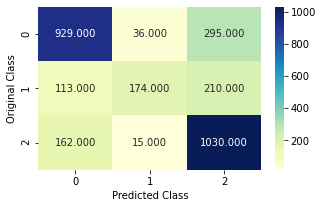

-------------------- Precision matrix (Columm Sum=1) --------------------


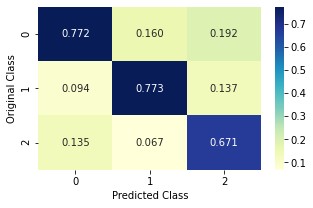

-------------------- Recall matrix (Row sum=1) --------------------


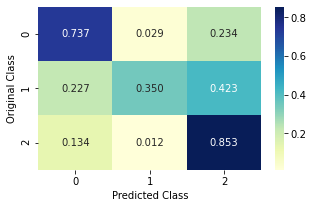

In [485]:
C_VC = confusion_matrix(test_y, vclf.predict(test_x_onehotCoding))
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(5,3))
sns.heatmap(C_VC, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


B_VC =(C_VC/C_VC.sum(axis=0))                                #    C = [[1, 2],
print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)        #         [3, 4]]
plt.figure(figsize=(5,3))                                       # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
sns.heatmap(B_VC, annot=True, cmap="YlGnBu", fmt=".3f")        # C.sum(axix =0) = [[4, 6]]
plt.xlabel('Predicted Class')                                   # (C/C.sum(axis=0)) = [[1/4, 2/6],
plt.ylabel('Original Class')                                    #                      [3/4, 4/6]]
plt.show() 
 

A_VC =(((C_VC.T)/(C_VC.sum(axis=1))).T)                       # C = [[1, 2],
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)              #     [3, 4]]
plt.figure(figsize=(5,3))                                       # C.T = [[1, 3],
sns.heatmap(A_VC, annot=True, cmap="YlGnBu", fmt=".3f")         #        [2, 4]]
plt.xlabel('Predicted Class')                                   # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
plt.ylabel('Original Class')                                    # C.sum(axix =1) = [[3, 7]]
plt.show()                                                      # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
                               

In [615]:
with open("Modeling_Voting", "wb") as f:
    pickle.dump(vclf,f)